# Version Control Parameters

In [1]:
version = "V2"
addInfo = "mitSMOTE"
date = '01-05-2024'

In [2]:
# Changelog

###### added window 3 to the list #####
###### added two additional Indicators (ATR und BollingerBands) ######
# added SMOTE Oversampling
# trained CNN 1 with 100 Features

# Imports

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from ta.trend import TRIXIndicator
from ta.trend import WMAIndicator
from ta.trend import CCIIndicator
from ta.volume import money_flow_index
import pandas_ta as pta
from ta.trend import MACD
from ta.momentum import PercentagePriceOscillator
from ta.momentum import ROCIndicator
from ta.volume import ChaikinMoneyFlowIndicator
from ta.trend import ADXIndicator
from ta.volatility import AverageTrueRange
from ta.volatility import BollingerBands

import joblib

# a simple CNN model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [8]:
# List of stocks which should be in the training data

#stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'PYPL', 'INTC', 'ADBE']

stocks = ['MMM', 'ABT', 'ABBV', 'ACN', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'AME', 'AMGN', 'APH', 'ADI', 'ANDV', 'ANSS', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BAC', 'BK', 'BAX', 'BDX', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'CHRW', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CNC', 'CNP', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DG', 'DLTR', 'D', 'DOV', 'DOW', 'DTE', 'DD', 'DUK', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LH', 'LRCX', 'LEG', 'LEN', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PEP', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYF', 'SNPS', 'SYY', 'TROW', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TWX', 'TJX', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UHS', 'UNM', 'VFC', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WYNN', 'XEL', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
print(len(stocks))

9


### Download data from Yahoo Finance

In [9]:
def download_stock_data(symbols):
    """
    Herunterladen von Aktiendaten mit yfinance und Speichern in CSV-Dateien.

    Parameter:
    - symbols: Eine Liste von Aktiensymbolen (z.B. ['AAPL', 'MSFT', 'GOOGL'])

    Rückgabewert:
    - None
    """
    for symbol in symbols:
        data = yf.download(symbol, start= '2018-01-01', end='2022-12-31')
        file_path = os.path.join('data', f'{symbol}.csv')
        data.to_csv(file_path)
        
        print(f'Aktiendaten für {symbol} heruntergeladen und in {file_path} gespeichert.')

In [10]:
download_stock_data(stocks)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für AAPL heruntergeladen und in data_test/AAPL.csv gespeichert.
Aktiendaten für MSFT heruntergeladen und in data_test/MSFT.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für GOOGL heruntergeladen und in data_test/GOOGL.csv gespeichert.
Aktiendaten für AMZN heruntergeladen und in data_test/AMZN.csv gespeichert.
Aktiendaten für TSLA heruntergeladen und in data_test/TSLA.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Aktiendaten für NVDA heruntergeladen und in data_test/NVDA.csv gespeichert.
Aktiendaten für PYPL heruntergeladen und in data_test/PYPL.csv gespeichert.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Aktiendaten für INTC heruntergeladen und in data_test/INTC.csv gespeichert.
Aktiendaten für ADBE heruntergeladen und in data_test/ADBE.csv gespeichert.


### Create dataframes for each stock

In [31]:
def create_dataframes():
    """
    Erstellt pro CSV-Datei einen DataFrame mit dem Namen der Aktie.

    Rückgabewert:
    - dataframes: Ein Dictionary, das die DataFrames enthält, wobei die Schlüssel die Aktiennamen sind.
    """
    dataframes = {}
    data_folder = 'data'

    # Durchlaufen aller CSV-Dateien im `data`-Ordner
    for file_name in os.listdir(data_folder):
        if file_name.endswith('.csv'):
            # Aktienname aus dem Dateinamen extrahieren (ohne '.csv')
            stock_name = os.path.splitext(file_name)[0]
            
            # DataFrame aus der CSV-Datei erstellen und im Dictionary speichern
            df = pd.read_csv(os.path.join(data_folder, file_name))
            dataframes[stock_name] = df
    return dataframes

# Beispielaufruf
dataframes = create_dataframes()
print(dataframes.keys())  # Ausgabe der Aktiennamen, die als Schlüssel im Dictionary gespeichert sind


dict_keys(['CSCO', 'UAL', 'TROW', 'ISRG', 'PRGO', 'DVN', 'MRO', 'BA', 'VRTX', 'GILD', 'EQIX', 'MDT', 'V', 'QRVO', 'A', 'FOX', 'MO', 'SWKS', 'MCHP', 'CHTR', 'EIX', 'BBY', 'WBA', 'HCA', 'AJG', 'DTE', 'C', 'T', 'CF', 'MGM', 'HUM', 'CBOE', 'CFG', 'WU', 'APH', 'SYY', 'MSI', 'FCX', 'ADM', 'LH', 'STI', 'LNT', 'BAC', 'LNC', 'PSX', 'GPN', 'SRCL', 'PPG', 'IRM', 'ESS', 'NOV', 'NAVI', 'HAL', 'STZ', 'FLS', 'DXC', 'ADI', 'F', 'HOG', 'ADBE', 'TDG', 'ULTA', 'ARE', 'SYK', 'CB', 'TSN', 'FLR', 'PEP', 'PEG', 'LLY', 'COST', 'REG', 'NWS', 'LOW', 'MDLZ', 'FMC', 'HCP', 'XEL', 'AIZ', 'PDCO', 'MET', 'CHK', 'FTV', 'DLR', 'XRAY', 'SCG', 'FAST', 'TJX', 'SNA', 'MPC', 'D', 'MRK', 'STX', 'NOC', 'BXP', 'KHC', 'IPG', 'UNP', 'ALLE', 'ABBV', 'ORCL', 'ECL', 'ETR', 'EBAY', 'SBUX', 'IR', 'AMT', 'INTU', 'CMA', 'PG', 'CAT', 'MCD', 'MNST', 'AMZN', 'INTC', 'PNR', 'GLW', 'BDX', 'KMI', 'PWR', 'EXR', 'HOLX', 'EXPD', 'GM', 'TXN', 'VRSK', 'SJM', 'TMO', 'OXY', 'RL', 'CCI', 'MMM', 'MOS', 'HSY', 'JNPR', 'DHI', 'ED', 'ES', 'ADSK', 'IP',

In [18]:
# change Date to datetime
for df in dataframes:
    dataframes[df]['Date'] = pd.to_datetime(dataframes[df]['Date'])


# set Date as index
for df in dataframes:
    dataframes[df].set_index('Date', inplace=True)

In [19]:
#just to check

print(len(stocks))
print(len(dataframes))

9
9


# Create Features

### Function Template for feature creation

In [ ]:
def get_NAME_FEATUERE(df):
    #implementation of the feature-calculation
    # directly add the feature to the dataframe
    # no reurn needed
    pass

### Window Parameter

In [ ]:
window = [3,5,7,9,11,13,15,17,19,21]

## Simple Moving Average SMA

In [ ]:
def get_SMA(df):
    for i in window:
        df[f"SMA_{i}"] = df['Close'].rolling(window=i).mean()

## Exponential Moving Average

In [ ]:
# a function for the exponential moving average
def get_EMA(df):
    for i in window:
        df[f"EMA_{i}"] = df['Close'].ewm(span=i, adjust=False).mean()   # adjust checken: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html

## Triple Exponential Moving Average (TEMA)

In [ ]:
def get_TRIX(df):
    for i in window:
        trix_values = TRIXIndicator(df['Close'], i).trix()
        df[f"TRIX_{i}"] = trix_values
    return df

## Mony Flow Index

The Money Flow Index (MFI) is a technical oscillator that uses price and volume data for identifying overbought or oversold signals in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

https://www.investopedia.com/terms/m/mfi.asp

In [ ]:
# Function to calculate Money Flow Index
# Uses monex_flow_index from ta library

def get_MFI(df):
    for i in window:
        df[f"money_flow_index_{i}"] = money_flow_index(df['High'], df['Low'], df['Close'], df['Volume'], window=i)  

## Smoothed RSI

In [ ]:
def get_RSI_smooth(df):
    """
    Momentum indicator
    As per https://www.investopedia.com/terms/r/rsi.asp
    RSI_1 = 100 - (100/ (1 + (avg gain% / avg loss%) ) )
    RSI_2 = 100 - (100/ (1 + (prev_avg_gain*13+avg gain% / prev_avg_loss*13 + avg loss%) ) )

    E.g. if period==6, first RSI starts from 7th index because difference of first row is NA
    http://cns.bu.edu/~gsc/CN710/fincast/Technical%20_indicators/Relative%20Strength%20Index%20(RSI).htm
    https://school.stockcharts.com/doku.php?id=technical_indicators:relative_strength_index_rsi
    Verified!
    """

    prev_rsi = np.inf
    prev_avg_gain = np.inf
    prev_avg_loss = np.inf
    rolling_count = 0

    def calculate_RSI(series, period):
        # nonlocal rolling_count
        nonlocal prev_avg_gain
        nonlocal prev_avg_loss
        nonlocal rolling_count

        # num_gains = (series >= 0).sum()
        # num_losses = (series < 0).sum()
        # sum_gains = series[series >= 0].sum()
        # sum_losses = np.abs(series[series < 0].sum())
        curr_gains = series.where(series >= 0, 0)  # replace 0 where series not > 0
        curr_losses = np.abs(series.where(series < 0, 0))
        avg_gain = curr_gains.sum() / period  # * 100
        avg_loss = curr_losses.sum() / period  # * 100
        rsi = -1

        if rolling_count == 0:
            # first RSI calculation
            rsi = 100 - (100 / (1 + (avg_gain / avg_loss)))
            # print(rolling_count,"rs1=",rs, rsi)
        else:
            # smoothed RSI
            # current gain and loss should be used, not avg_gain & avg_loss
            rsi = 100 - (100 / (1 + ((prev_avg_gain * (period - 1) + curr_gains.iloc[-1]) /
                                     (prev_avg_loss * (period - 1) + curr_losses.iloc[-1]))))
            # print(rolling_count,"rs2=",rs, rsi)

        # df['rsi_'+str(period)+'_own'][period + rolling_count] = rsi
        rolling_count = rolling_count + 1
        prev_avg_gain = avg_gain
        prev_avg_loss = avg_loss
        return rsi

    diff = df['Close'].diff()[1:]  # skip na
    for i in window:
        df['rsi_' + str(i)] = np.nan
        # df['rsi_'+str(period)+'_own_1'] = np.nan
        rolling_count = 0
        res = diff.rolling(i).apply(calculate_RSI, args=(i,), raw=False)
        df['rsi_' + str(i)][1:] = res

## Williams %R

https://de.wikipedia.org/wiki/Williams_%25R

In [ ]:
def get_WILLIAMS_R(df):
    for i in window:
        highest_high = df['High'].rolling(window=i).max()
        lowest_low = df['Low'].rolling(window=i).min()
        df[f"williams_r_{i}"] = ((highest_high - df['Close']) / (highest_high - lowest_low)) * (-100)

## WMA - Weighted Moving Average

In [ ]:
def get_WMA(df):
    for i in window:
        df[f"wma_{i}"] = WMAIndicator(df['Close'], i).wma()

## HMA - Hull Moving Average

In [ ]:
#  ToDo: Formel und Resultate noch zu validieren!!

def get_HMA(df):
    """
    Berechnet den Hull Moving Average (HMA) und fügt ihn als neue Spalte zum DataFrame hinzu.
    
    """

    for i in window:
        wma1 = 2 * df['Close'].rolling(window=int(i / 2)).mean()
        wma2 = df['Close'].rolling(window=i).mean()
        diff = wma1 - wma2
        hma = diff.rolling(window=int(np.sqrt(i))).mean()
        df[f"hma_{i}"] = hma


## CCI - Commodity Channel Index

In [ ]:
def get_CCI(df):
    for i in window:
        cci_values = CCIIndicator(df['High'], df['Low'], df['Close'], i).cci()
        df[f"cci_{i}"] = cci_values

## CMO - Chande Momentum Oszillator

In [ ]:
# https://github.com/twopirllc/pandas-ta?tab=readme-ov-file#trend-18
# ToDo: Check!

def get_CMO(df):
    for i in window:
        df[f"cmo_{i}"] = pta.cmo(df['Close'], length=i)

## MACD - Moving Average Convergence Divergence

In [ ]:
## https://www.lynxbroker.ch/boerse/trading/technische-analyse/technische-indikatoren/der-macd-indikator-bestimmen-sie-die-richtung-und-staerke-des-trends/

In [ ]:
# ToDo: Check and Implementation for different windows

def get_MACD(df):
    macd_object = MACD(df['Close'])
    df['MACD'] = macd_object.macd()
    df['MACD_Signal'] = macd_object.macd_signal()
    df['MACD_Diff'] = macd_object.macd_diff()

## PPO - Percentage Price Oscillator

https://school.stockcharts.com/doku.php?id=technical_indicators:price_oscillators_ppo

In [ ]:
# ToDo: Check and Implementation for different windows

def get_PPO(df):
        ppo_object = PercentagePriceOscillator(df['Close'])
        df[f"PPO"] = ppo_object.ppo()
        df[f"PPO_Histogram"] = ppo_object.ppo_hist()
        df[f"PPO_Signal"] = ppo_object.ppo_signal()

## ROC - Rate of Change

https://school.stockcharts.com/doku.php?id=technical_indicators:rate_of_change_roc_and_momentum

In [ ]:
def get_ROC(df):
    for i in window:
        df[f"ROC_{i}"] = ROCIndicator(df['Close'], i).roc()

## CMI - Chaikin Money Flow

https://school.stockcharts.com/doku.php?id=technical_indicators:chaikin_money_flow_cmf

In [ ]:
def get_CMF(df):
    for i in window:
        df[f"cmf_{i}"] = ChaikinMoneyFlowIndicator(df['High'], df['Low'], df['Close'], df['Volume'], i).chaikin_money_flow()

## ADX - Average Directional Movement Index (ADX)

http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:average_directional_index_adx

In [ ]:
def get_ADX(df):
    for i in window:
        df[f"adx_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx()
        df[f"adx_pos_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx_pos()
        df[f"adx_neg_{i}"] = ADXIndicator(df['High'], df['Low'], df['Close'], i).adx_neg()

## Average True Range (ATR) 

für Volaitilität

In [ ]:
def get_ATR(df):
    for i in window:
        df[f"atr_{i}"] = AverageTrueRange(df['High'], df['Low'], df['Close'], i).average_true_range()

## Bollinger Bands

für Volatilität

In [ ]:
def get_BollingerBands(df):
    for i in window:
        bb = BollingerBands(df['Close'], window=i, window_dev=2)
        df[f"bb_bbm_{i}"] = bb.bollinger_mavg()
        df[f"bb_bbh_{i}"] = bb.bollinger_hband()
        df[f"bb_bbl_{i}"] = bb.bollinger_lband()

## Calculation of all features

In [ ]:
def create_features(df):
    get_SMA(df)
    get_EMA(df)
    get_TRIX(df)
    get_MFI(df)
    get_RSI_smooth(df)
    get_WILLIAMS_R(df)
    get_WMA(df)
    get_HMA(df)
    get_CCI(df)
    get_CMO(df)
    get_MACD(df)
    get_PPO(df)
    get_ROC(df)
    get_CMF(df)
    get_ADX(df)
    get_ATR(df)
    get_BollingerBands(df)
    
    #print('Feature creation done!')

In [ ]:
# calculate features for all dataframes

for df in dataframes:
    print(f'Calculating features for {df}...')
    create_features(dataframes[df])
    print(f'Features for {df} calculated.')

print('All features calculated.')

### Example DF

In [14]:
dataframes['AAPL'].head(40)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670967,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663895,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852779,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317902,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164425,82271200
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.159710,86336000
2018-01-10,43.290001,43.575001,43.250000,43.572498,41.150261,95839600
2018-01-11,43.647499,43.872501,43.622501,43.820000,41.384007,74670800
2018-01-12,44.044998,44.340000,43.912498,44.272499,41.811356,101672400


# Labeling

In [ ]:
# Function to lable the data
# if i + 11 is the max value in the window, label as BUY
# if i + 11 is the min value in the window, label as SELL
# else label as HOLD
# Idea: Buy when the stock is at its lowest in the window, sell when it is at its highest

# Source: https://medium.com/@quantclubiitkgp/stock-buy-sell-hold-prediction-using-cnn-ee7b671f4ad3


def get_labels_END(df, windowSize=11):
   labels = [] 
   values = []
   for i in range(len(df.Close) - windowSize): 
      mx = df.Close.iloc[i]
      mn = df.Close.iloc[i]
      mxIndex, mnIndex = i, i
      for j in range(i + 1, i + windowSize + 1): 
         if df.Close.iloc[j] > mx:
               mx = df.Close.iloc[j]
               mxIndex = j
         if df.Close.iloc[j] < mn: 
               mn = df.Close.iloc[j] 
               mnIndex = j

      if mnIndex == i + 11:
         labels.append('SELL')
         values.append(i + 11)
      elif mxIndex == i + 11:
         labels.append('BUY')
         values.append(i + 11)
      else:
         labels.append('HOLD')
         values.append(i + 11)
   
   # Append 11 times a 999 to the end of the labels list
   for i in range(11):
      labels.append(999)

   # Append the labels to the dataframe from the start
   df['Labels_END'] = labels

   # Replace the 999 with NaN
   df['Labels_END'] = df['Labels_END'].replace(999, np.nan)

   print('Labeling END done!')

   return df


In [20]:
# Source: https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3


def get_labels_MID(df, col_name, window_size=11):
        """
        Data is labeled as per the logic in research paper
        Label code : BUY => 1, SELL => 0, HOLD => 2
        params :
            df => Dataframe with data
            col_name => name of column which should be used to determine strategy
        returns : nothing - df is modified directly
        """

        row_counter = 0
        total_rows = len(df)
        labels = np.zeros(total_rows)
        labels[:] = np.nan

        while row_counter < total_rows:
            if row_counter >= window_size - 1:
                window_begin = row_counter - (window_size - 1)
                window_end = row_counter
                window_middle = int((window_begin + window_end) / 2)

                min_ = np.inf
                min_index = -1
                max_ = -np.inf
                max_index = -1
                for i in range(window_begin, window_end + 1):
                    price = df.iloc[i][col_name]
                    if price < min_:
                        min_ = price
                        min_index = i
                    if price > max_:
                        max_ = price
                        max_index = i

                if max_index == window_middle:
                    labels[window_middle] = 0
                elif min_index == window_middle:
                    labels[window_middle] = 1
                else:
                    labels[window_middle] = 2

            row_counter = row_counter + 1

        # Add labels to the dataframe
        df['Labels_MID'] = labels

        # Replace the 0, 1, 2 with BUY, SELL, HOLD
        df['Labels_MID'] = df['Labels_MID'].replace(0, 'SELL')
        df['Labels_MID'] = df['Labels_MID'].replace(1, 'BUY')
        df['Labels_MID'] = df['Labels_MID'].replace(2, 'HOLD')

In [21]:
# Create Labels for all dataframes
i = 1
for df in dataframes:
    get_labels_MID(dataframes[df], 'Close')
    print(f'Labels for {df} created. -- {i}/{len(dataframes)}')
    i += 1

Labels for ADBE created. -- 1/9
Labels for AMZN created. -- 2/9
Labels for INTC created. -- 3/9
Labels for PYPL created. -- 4/9
Labels for MSFT created. -- 5/9
Labels for NVDA created. -- 6/9
Labels for TSLA created. -- 7/9
Labels for GOOGL created. -- 8/9
Labels for AAPL created. -- 9/9


### Plots

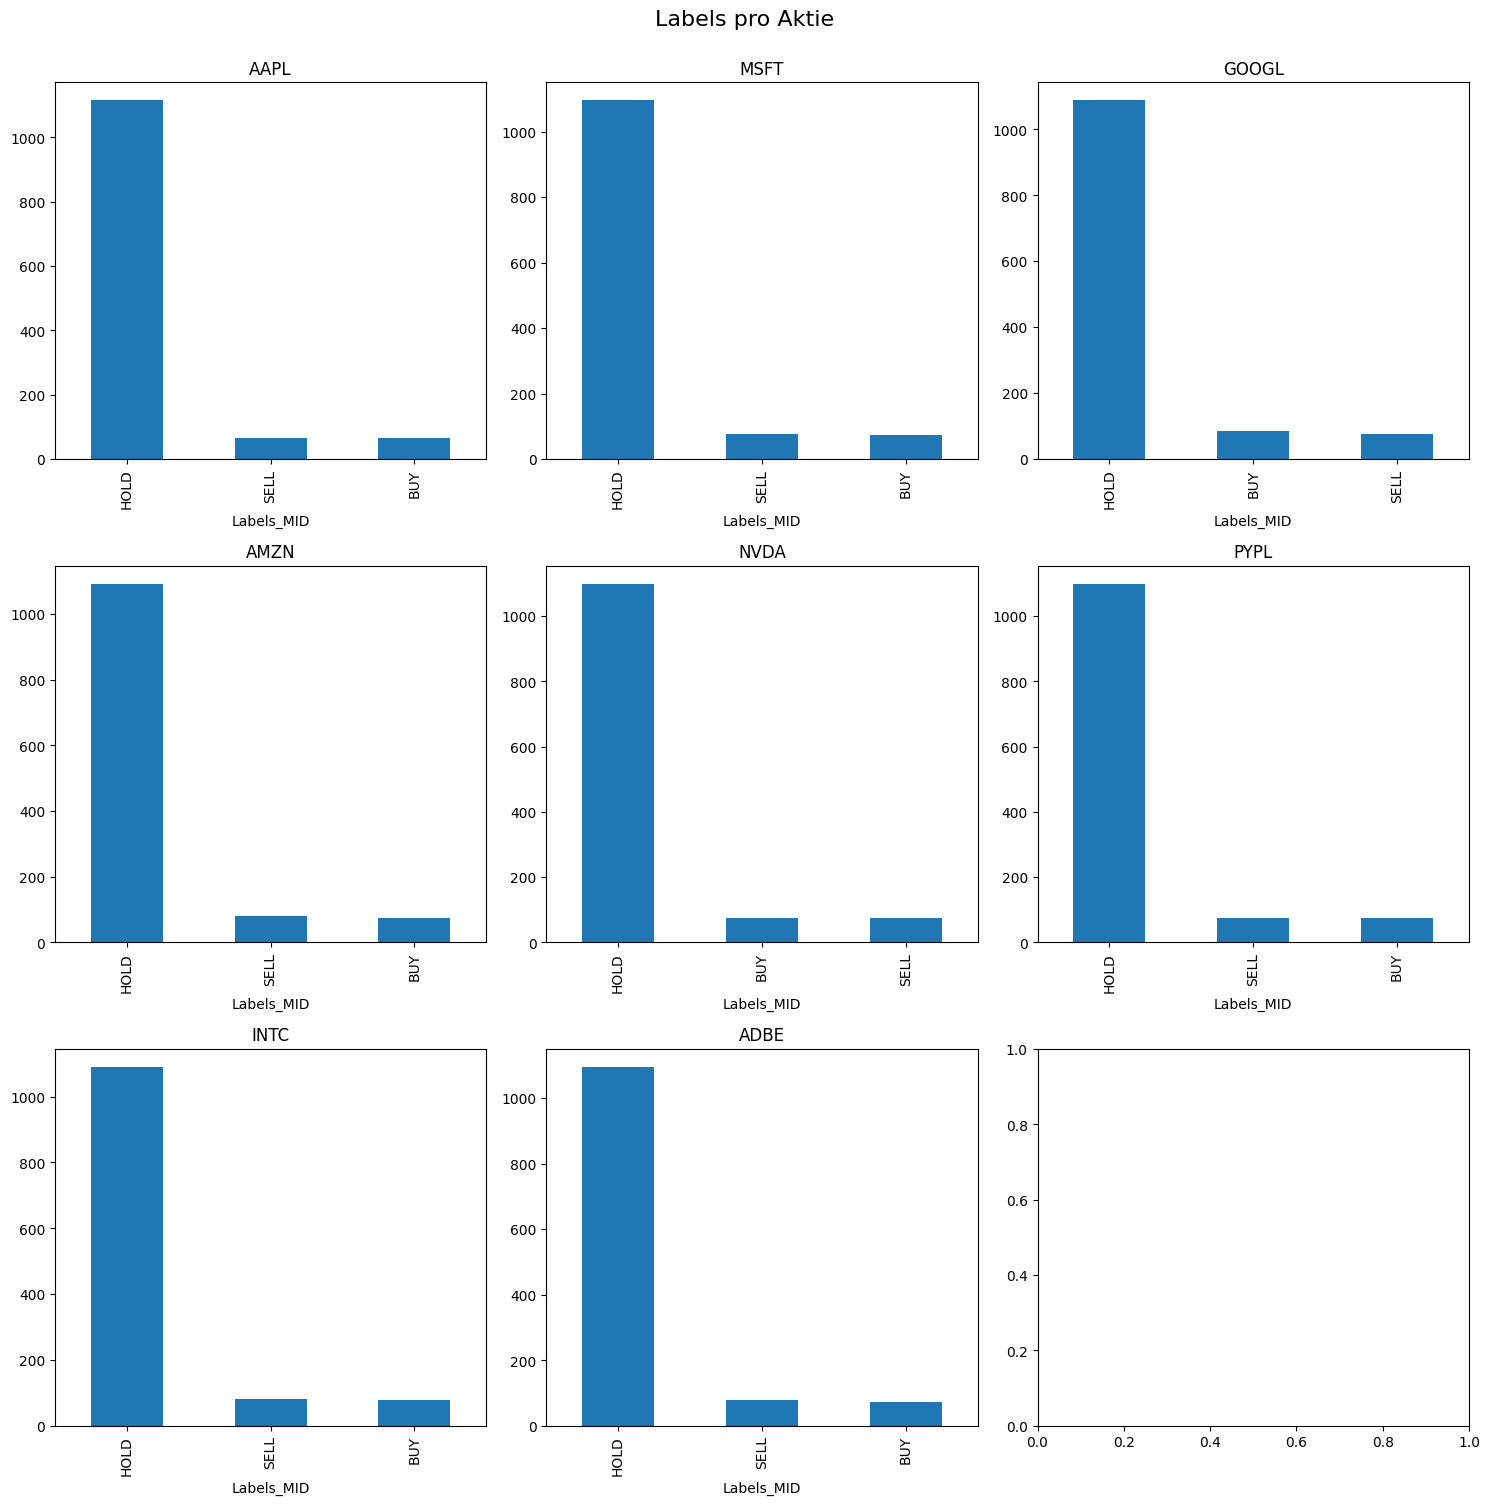

In [30]:
import matplotlib.pyplot as plt

def plot_labels_per_stock(dataframes, stock_names):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))
    axs = axs.flatten()

    for i, stock_name in enumerate(stock_names):
        df = dataframes.get(stock_name)  # DataFrame für die aktuelle Aktie erhalten
        if df is None:
            print(f"Dataframe for {stock_name} not found.")
            continue

        ax = axs[i]
        df['Labels_MID'].value_counts().plot(kind='bar', ax=ax, title=stock_name)

    fig.suptitle('Labels pro Aktie', fontsize=16, y=1.0005)
    plt.tight_layout()

    # save the plot
    plt.savefig('Plots/labels_per_stock.png')


    plt.show()

# Aufruf der Funktion
stock_name_plot = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'PYPL', 'INTC', 'ADBE'] #Liste der Aktien, die geplottet werden sollen
plot_labels_per_stock(dataframes, stock_name_plot)


Dataframe for ZION not found.


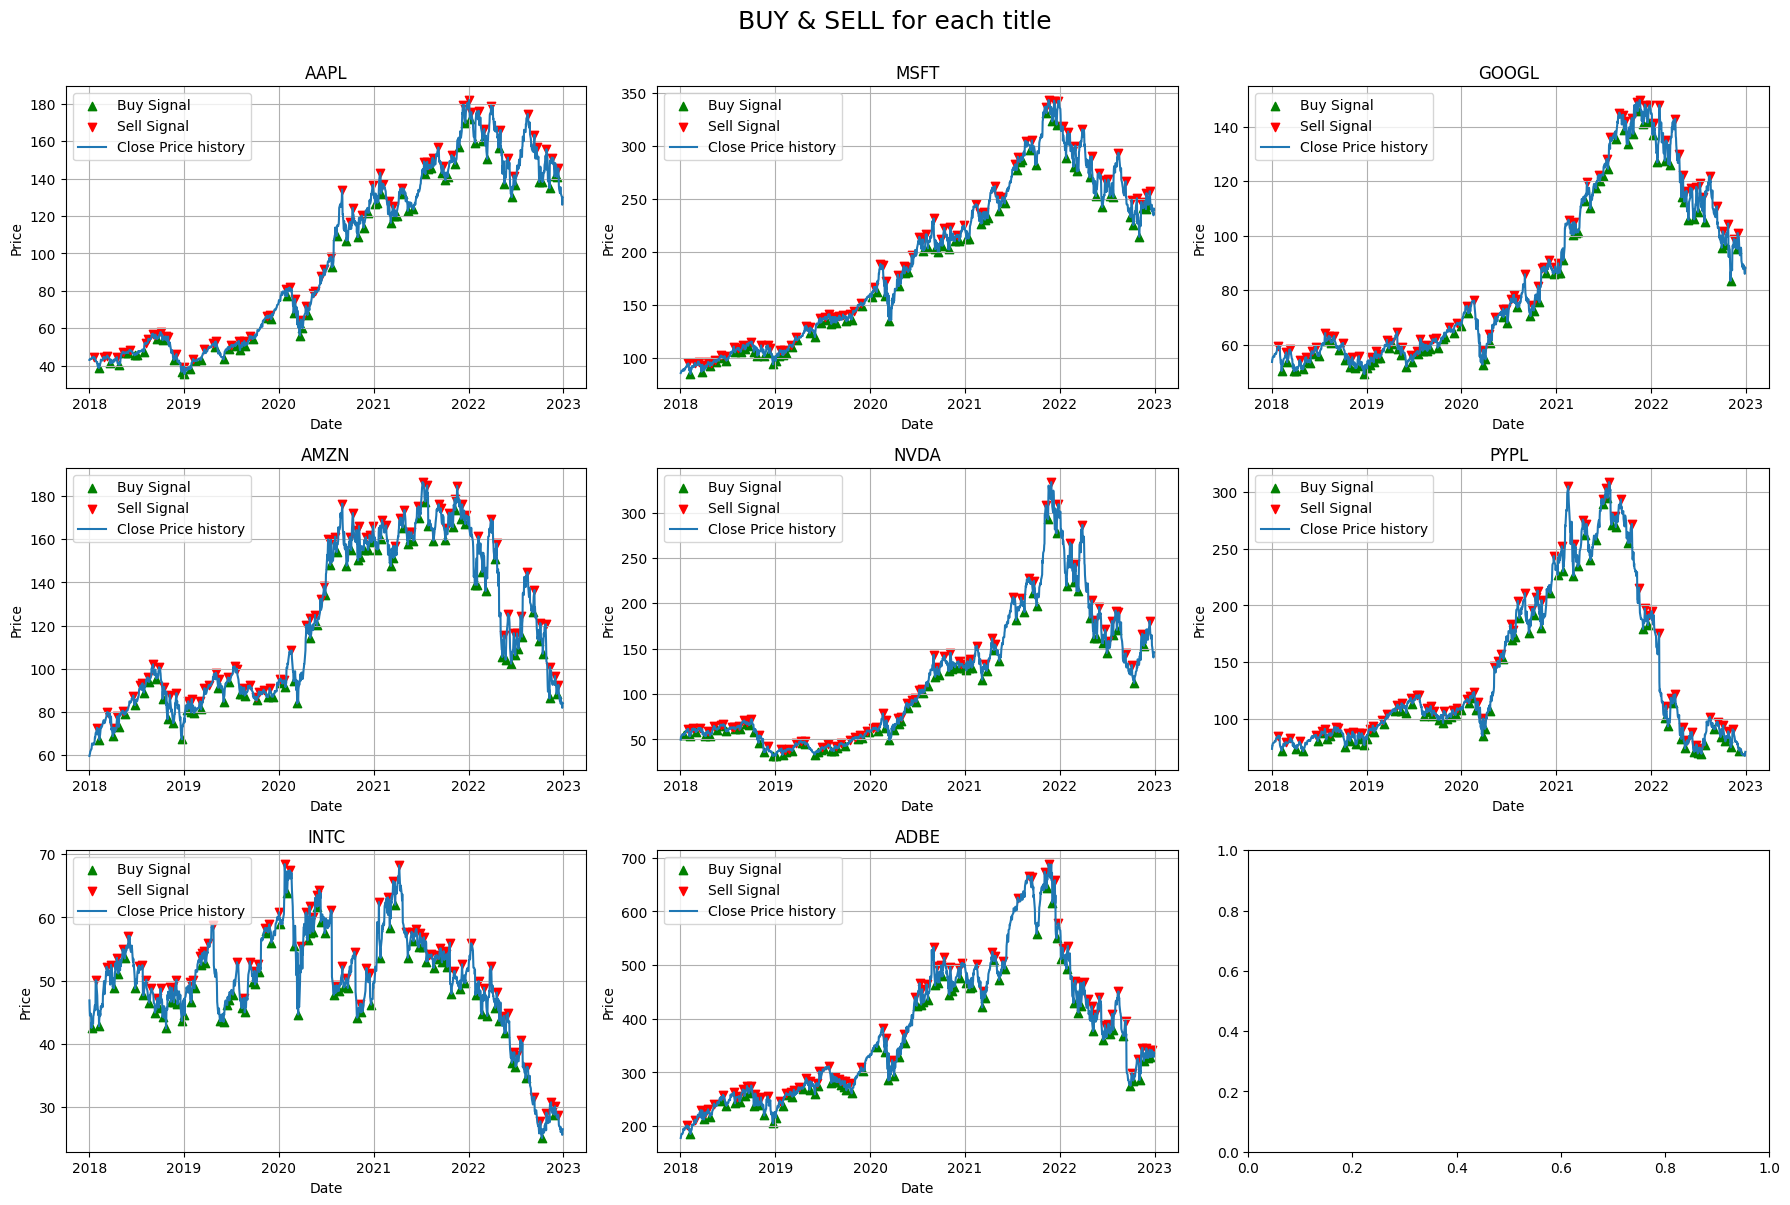

In [23]:
import matplotlib.pyplot as plt

def plot_stock_price(dataframes, stock_names):
    num_plots = len(stock_names)
    num_rows = (num_plots + 2) // 3 

    fig, axs = plt.subplots(num_rows, 3, figsize=(18, 4 * num_rows))
    axs = axs.flatten()

    for i, stock_name in enumerate(stock_names):
        df = dataframes.get(stock_name)  # DataFrame für die aktuelle Aktie erhalten
        if df is None:
            print(f"Dataframe for {stock_name} not found.")
            continue

        ax = axs[i]
        buy = df[df['Labels_MID'] == 'BUY']
        sell = df[df['Labels_MID'] == 'SELL']
        ax.scatter(buy.index, buy['Close'], color='g', label='Buy Signal', marker='^', alpha=1)
        ax.scatter(sell.index, sell['Close'], color='r', label='Sell Signal', marker='v', alpha=1)

        ax.plot(df['Close'], label='Close Price history')
        ax.set_title(f'{stock_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend(loc='upper left')
        ax.grid()
        fig.suptitle('BUY & SELL for each title', fontsize=18, y=1.0005)

    plt.tight_layout()
    plt.show()

# Aufruf der Funktion
stock_name_plot = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'PYPL', 'INTC', 'ADBE', 'ZION'] #Liste der Aktien, die geplottet werden sollen
plot_stock_price(dataframes, stock_name_plot)


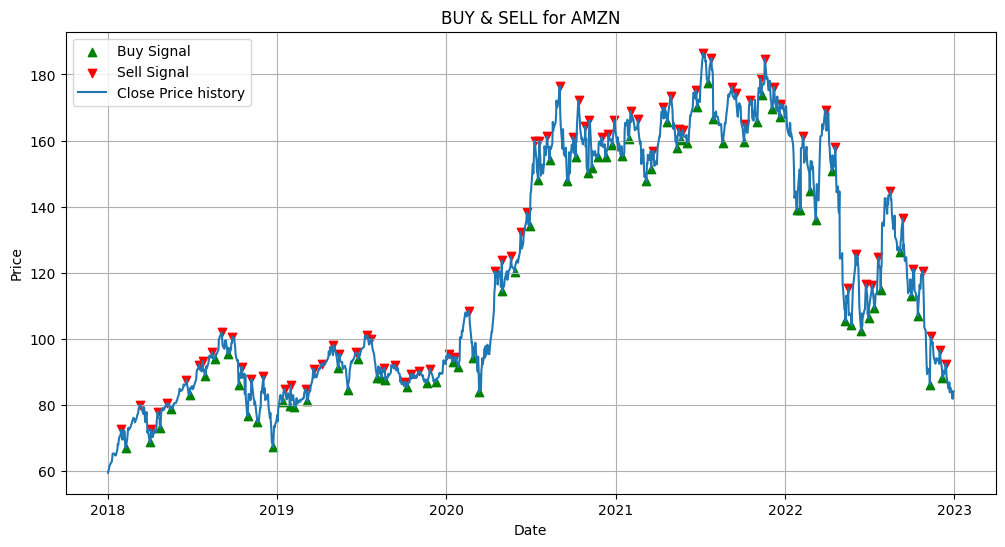

In [29]:
# function to create a single plot

def plot_single_stock_price(stock_name):
    df = dataframes[stock_name]
    fig, ax = plt.subplots(figsize=(12, 6))
    buy = df[df['Labels_MID'] == 'BUY']
    sell = df[df['Labels_MID'] == 'SELL']
    ax.scatter(buy.index, buy['Close'], color='g', label='Buy Signal', marker='^', alpha=1)
    ax.scatter(sell.index, sell['Close'], color='r', label='Sell Signal', marker='v', alpha=1)

    ax.plot(df['Close'], label='Close Price history')
    ax.set_title(f'BUY & SELL for {stock_name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='upper left')
    ax.grid()

    # save the plot
    plot_name = f"Plots/Labeling_{stock_name}.png"
    plt.savefig(plot_name)

    plt.show()


# Aufruf der Funktion
plot_single_stock_price('AMZN')



## Feature Engineering

The reason behind having this step in our pipeline is that Feature engineering involves creating, transforming, or selecting the most relevant variables in your dataset to improve model performance. This process is critical because it enables the model to learn from the data more effectively, leading to better predictions and insights. Feature selection, in particular, trims down the feature set to keep only the most valuable attributes, reducing complexity, computation time, and the risk of overfitting. In essence, these techniques streamline the modelling process, making it more accurate, interpretable, and efficient, while also saving time and resources.
First, we Normalize our data set because Normalizing a dataset is crucial to ensure that all features are on a consistent scale, preventing one feature from dominating the analysis, improving model convergence, aiding in the interpretation of feature importance, making distance-based algorithms more reliable, and aligning with assumptions of regularisation techniques, all of which contribute to more effective and robust data analysis and machine learning.
Then we will just apply a small filter of variance with a threshold of 0.1 i.e. any feature which has a variance less than or equal to 0.1 will be removed from the dataset as having this low variance does not contribute much to detecting the trend in the dataset.

### Cleaning individual dataframes

In [ ]:
# Drop the NaN values and 0.00 from the dataframe
for i in dataframes:
    dataframes[i].dropna(inplace=True)
    dataframes[i] = dataframes[i][dataframes[i]['Close'] != 0.00]

### Merge the dataframes

In [ ]:
# merge the dataframes to one dataframe
# save it as a csv file
data_name = f"merged_data/merged_data_large_{version}.csv"
merged_df = pd.concat(dataframes)
merged_df.to_csv(data_name)

In [ ]:
merged_df.tail()

In [6]:
# load the merged data
merged_df = pd.read_csv('merged_data/merged_data_large_v2.csv')

### Encode the labels

In [9]:
# Encode the labels
# Manual encoding

merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('BUY', 0)
merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('SELL', 1)
merged_df['Labels_MID'] = merged_df['Labels_MID'].replace('HOLD', 2)

### Calculation of possible amount of features

In [10]:
# Function to calculate the number of features

def calc_feature_number(features):
    features = len(features)
    return np.floor(np.sqrt(features)).astype(int)

In [11]:
list_features = list(merged_df.loc[:, 'Open':'bb_bbl_21'].columns)
print('Total number of features: ', len(list_features))
print('Largest number of features that can be used in the model: ', calc_feature_number(list_features))
print(f"k = {calc_feature_number(list_features)**2}")

Total number of features:  202
Largest number of features that can be used in the model:  14
k = 196


### Train - Valid - Test Split and Normalization

In [54]:
### just copied from: https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3
### needs to be reworked and adapted to the features we want to use
### create function for this


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter

df = merged_df.dropna()

list_features = list(df.loc[:, 'Open':'bb_bbl_21'].columns)  # needs to be changed to the features you want to use
print('Total number of features', len(list_features))
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'Open':'bb_bbl_21'], df['Labels_MID'], train_size=0.8, 
                                                    test_size=0.2, random_state=2, shuffle=True, stratify=df['Labels_MID'])

train_split = 0.8

print('train_split =',train_split)
x_train, x_cv, y_train, y_cv = train_test_split(x_train, y_train, train_size=train_split, test_size=1-train_split, 
                                                random_state=2, shuffle=True, stratify=y_train)
mm_scaler = MinMaxScaler(feature_range=(0, 1)) # or StandardScaler?
x_train = mm_scaler.fit_transform(x_train)
x_cv = mm_scaler.transform(x_cv)
x_test = mm_scaler.transform(x_test)

print("Shape of x, y train/cv/test {} {} {} {} {} {}".format(x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape))

Total number of features 202
train_split = 0.8
Shape of x, y train/cv/test (322318, 202) (322318,) (80580, 202) (80580,) (100725, 202) (100725,)


In [55]:
# save the scaler
scaler_name = f"models/scaler_{version}.pkl"
joblib.dump(mm_scaler, scaler_name)

['models/scaler_V2.pkl']

## Oversampling SMOTE

In [56]:
from imblearn.over_sampling import SMOTE

In [57]:
# create artificial data with SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [58]:
# count number of records in each class
count = Counter(y_train)
print(count)

Counter({2: 282813, 0: 282813, 1: 282813})


# Feature Selection

Now the main part is that we will calculate the importance of each feature by using Random Forest Classifier and then reduce the feature size to 81.

A rough idea of how random forest works is for each decision point (split) in each tree, the Random Forest algorithm measures the decrease in impurity(Gini impurity) resulting from the split. The impurity reduction brought about by each feature is averaged across all the trees in the forest. Features that consistently reduce impurity more effectively when used in splits are considered more important

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [60]:
from sklearn.feature_selection import SelectKBest, chi2

# Anwenden der Feature Selection mit SelectKBest und Chi-Quadrat-Test
k = 100  # Anzahl der gewünschten Merkmale
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(x_train, y_train)

# Index der ausgewählten Merkmale
selected_feature_indices = selector.get_support(indices=True)

# Ausgabe der Indizes der ausgewählten Merkmale
print("Indizes der ausgewählten Merkmale:")
print(selected_feature_indices)


Indizes der ausgewählten Merkmale:
[  3   4  26  27  28  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  76
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 109 110 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 139 140 142 143 145 146
 148 149 151 152 154 155 157 158 160 161]


In [61]:

# save selected_feature_indices in a txt file
np.savetxt(f"models/selected_features_{version}_{addInfo}.txt", selected_feature_indices, fmt='%d')

In [62]:
len(selected_feature_indices)

100

In [63]:
# only use the selected features
x_train = x_train[:, selected_feature_indices]
x_cv = x_cv[:, selected_feature_indices]
x_test = x_test[:, selected_feature_indices]

## Image Creation

In [64]:
# Function to reshape the data
# Creates a 3D array (x, y and images for each row) for the CNN

def reshape_as_image(x, img_width, img_height):
    x_temp = np.zeros((len(x), img_height, img_width))
    for i in range(x.shape[0]):
        # print(type(x), type(x_temp), x.shape)
        x_temp[i] = np.reshape(x[i], (img_height, img_width))

    return x_temp

In [65]:
dim = int(np.sqrt(k))
x_train = reshape_as_image(x_train, dim, dim)
x_cv = reshape_as_image(x_cv, dim, dim)
x_test = reshape_as_image(x_test, dim, dim)
# adding a 1-dim for channels (3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)
x_cv = np.stack((x_cv,) * 3, axis=-1)

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of x_cv: {x_cv.shape}')
print(f'Shape of x_test: {x_test.shape}')




Shape of x_train: (848439, 10, 10, 3)
Shape of x_cv: (80580, 10, 10, 3)
Shape of x_test: (100725, 10, 10, 3)


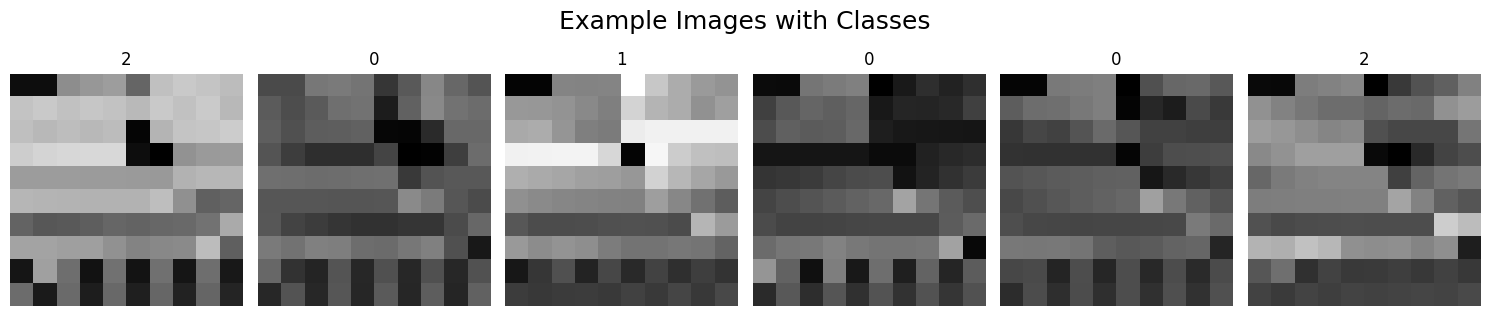

In [66]:
fig, axs = plt.subplots(1, 6, figsize=(15, 10))

for i in range(6):
    sample = np.random.randint(0, x_train.shape[0])
    axs[i].imshow(x_train[sample])
    axs[i].set_title(y_train.iloc[sample])
    axs[i].axis('off')

plt.tight_layout()
fig.suptitle('Example Images with Classes', fontsize=18, y=0.68)
plt.show()

## CNN

In [67]:
# compute class weights
counter = Counter(y_train)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
print('Class weights: ', class_weights)

Class weights:  {2: 1.0, 0: 1.0, 1: 1.0}


In [68]:
# make a array from y_train and y_cv
y_train = np.array(y_train)
y_cv = np.array(y_cv)
y_test = np.array(y_test)


## simple Baseline CNN model

In [69]:
# Model 1

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'],)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto', restore_best_weights = True, start_from_epoch = 50)


history = model.fit(x_train, y_train,
                    validation_data=(x_cv, y_cv),
                    batch_size=64,
                    epochs=300,
                    callbacks=[early_stopping],
                    class_weight=class_weights)

Epoch 1/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.7784 - loss: 0.5082 - val_accuracy: 0.5750 - val_loss: 0.7362
Epoch 2/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8096 - loss: 0.4523 - val_accuracy: 0.5704 - val_loss: 0.6921
Epoch 3/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8122 - loss: 0.4452 - val_accuracy: 0.6025 - val_loss: 0.6444
Epoch 4/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8149 - loss: 0.4403 - val_accuracy: 0.6202 - val_loss: 0.6389
Epoch 5/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.8142 - loss: 0.4398 - val_accuracy: 0.5899 - val_loss: 0.6732
Epoch 6/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.8156 - loss: 0.4359 - val_accuracy: 0.5782 - val_loss: 0.7349
Epoch 7/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.8159 - loss: 0.4351 - val_accuracy: 0.5862 - val_loss: 0.6785
Epoch 8/300
13257/13257 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - ac

In [70]:
# save the model
model_name = f"models/stock_prediction_model_{version}_{addInfo}.keras"
model.save(model_name)

## larger Model - not optimzed yet!

In [ ]:
# Model 2
model = tf.keras.models.Sequential()

# 1st convolutional layer
model.add(tf.keras.layers.Conv2D(16, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 2nd convolutional layer
model.add(tf.keras.layers.Conv2D(32, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# 3rd convolutional layer
model.add(tf.keras.layers.Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

# FFNN
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(3, activation='sigmoid'))

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, mode='auto')

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.utils import to_categorical

# Wandele die Zielwerte in das One-Hot-Encoding-Format um
y_train_encoded = to_categorical(y_train, num_classes=3)
y_cv_encoded = to_categorical(y_cv, num_classes=3)

history = model.fit(x_train, y_train_encoded,
                    validation_data=(x_cv, y_cv_encoded),
                    epochs=200,
                    callbacks=[early_stopping],
                    class_weight={0: class_weights[0], 1: class_weights[1], class_weights[2]: 2})


In [ ]:
# save the model
model_name = f"models/stock_prediction_model_{version}.h5"
model.save(model_name)

# Plots and Evaluation

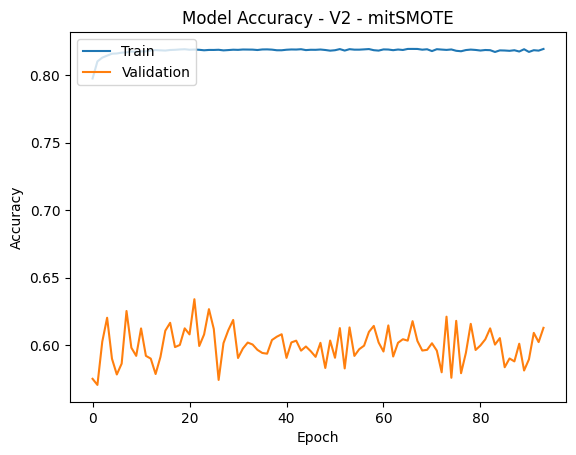

<Figure size 640x480 with 0 Axes>

In [71]:
# plot the histrory of the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"Model Accuracy - {version} - {addInfo}")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
# save the plot
plot_name = f"Plots/accuracy_plot_{version}_{addInfo}.png"
plt.savefig(plot_name)
plt.show()



2519/2519 ━━━━━━━━━━━━━━━━━━━━ 2s 609us/step


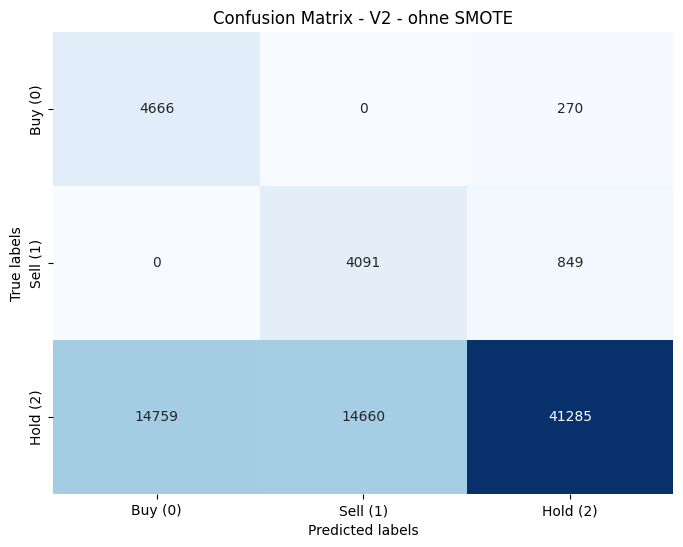

<Figure size 640x480 with 0 Axes>

In [72]:
# ToDo: Checken!! Made with ChatGPT!!
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Vorhersagen für Validierungsdaten machen
y_pred = model.predict(x_cv)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix berechnen
conf_matrix = confusion_matrix(y_cv, y_pred_classes)

# Confusion Matrix plotten
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Buy (0)', 'Sell (1)', 'Hold (2)'], 
            yticklabels=['Buy (0)', 'Sell (1)', 'Hold (2)'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Confusion Matrix - {version} - ohne SMOTE")
# save the plot
plot_name = f"Plots/confusion_matrix_{version}_{addInfo}.png"
plt.savefig(plot_name)
plt.show()



In [73]:
# calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_cv, y_pred_classes)
print('Accuracy on validation data: ', accuracy)

Accuracy on validation data:  0.6210225862496898


## Test

In [74]:
# Accuracy on test data
y_test = np.array(y_test)
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Accuracy on test data: ', test_accuracy)

3148/3148 ━━━━━━━━━━━━━━━━━━━━ 2s 550us/step - accuracy: 0.6246 - loss: 0.5861
Accuracy on test data:  0.6232017874717712


# Packages

# Name                    Version                   Build  Channel
absl-py                   2.1.0                    pypi_0    pypi
altair                    5.3.0                    pypi_0    pypi
appdirs                   1.4.4                    pypi_0    pypi
appnope                   0.1.4              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-forge
astunparse                1.6.3                    pypi_0    pypi
attrs                     23.2.0                   pypi_0    pypi
beautifulsoup4            4.12.3                   pypi_0    pypi
blinker                   1.7.0                    pypi_0    pypi
bzip2                     1.0.8                h93a5062_5    conda-forge
ca-certificates           2024.2.2             hf0a4a13_0    conda-forge
cachetools                5.3.3                    pypi_0    pypi
certifi                   2024.2.2                 pypi_0    pypi
cffi                      1.16.0                   pypi_0    pypi
charset-normalizer        3.3.2                    pypi_0    pypi
click                     8.1.7                    pypi_0    pypi
clr-loader                0.2.6                    pypi_0    pypi
coloredlogs               15.0.1                   pypi_0    pypi
comm                      0.2.1              pyhd8ed1ab_0    conda-forge
contourpy                 1.2.0                    pypi_0    pypi
cycler                    0.12.1                   pypi_0    pypi
dataclasses-json          0.5.14                   pypi_0    pypi
debugpy                   1.8.1           py311h92babd0_0    conda-forge
decorator                 5.1.1              pyhd8ed1ab_0    conda-forge
exceptiongroup            1.2.0              pyhd8ed1ab_2    conda-forge
executing                 2.0.1              pyhd8ed1ab_0    conda-forge
filelock                  3.13.3                   pypi_0    pypi
flatbuffers               24.3.25                  pypi_0    pypi
fonttools                 4.49.0                   pypi_0    pypi
frozendict                2.4.0                    pypi_0    pypi
gast                      0.5.4                    pypi_0    pypi
gitdb                     4.0.11                   pypi_0    pypi
gitpython                 3.1.43                   pypi_0    pypi
google-pasta              0.2.0                    pypi_0    pypi
grpcio                    1.62.1                   pypi_0    pypi
h5py                      3.11.0                   pypi_0    pypi
html5lib                  1.1                      pypi_0    pypi
humanfriendly             10.0                     pypi_0    pypi
idna                      3.6                      pypi_0    pypi
imbalanced-learn          0.12.2                   pypi_0    pypi
imblearn                  0.0                      pypi_0    pypi
importlib-metadata        7.0.1              pyha770c72_0    conda-forge
importlib_metadata        7.0.1                hd8ed1ab_0    conda-forge
ipykernel                 6.29.3             pyh3cd1d5f_0    conda-forge
ipython                   8.22.1             pyh707e725_0    conda-forge
jedi                      0.19.1             pyhd8ed1ab_0    conda-forge
jinja2                    3.1.3                    pypi_0    pypi
joblib                    1.3.2                    pypi_0    pypi
jsonlines                 3.1.0                    pypi_0    pypi
jsonschema                4.21.1                   pypi_0    pypi
jsonschema-specifications 2023.12.1                pypi_0    pypi
jupyter_client            8.6.0              pyhd8ed1ab_0    conda-forge
jupyter_core              5.7.1           py311h267d04e_0    conda-forge
keras                     3.2.1                    pypi_0    pypi
kiwisolver                1.4.5                    pypi_0    pypi
libclang                  18.1.1                   pypi_0    pypi
libcxx                    16.0.6               h4653b0c_0    conda-forge
libexpat                  2.5.0                hb7217d7_1    conda-forge
libffi                    3.4.2                h3422bc3_5    conda-forge
libsodium                 1.0.18               h27ca646_1    conda-forge
libsqlite                 3.45.1               h091b4b1_0    conda-forge
libzlib                   1.2.13               h53f4e23_5    conda-forge
lxml                      5.1.0                    pypi_0    pypi
markdown                  3.6                      pypi_0    pypi
markdown-it-py            3.0.0                    pypi_0    pypi
markupsafe                2.1.5                    pypi_0    pypi
marshmallow               3.21.1                   pypi_0    pypi
matplotlib                3.8.3                    pypi_0    pypi
matplotlib-inline         0.1.6              pyhd8ed1ab_0    conda-forge
mdurl                     0.1.2                    pypi_0    pypi
ml-dtypes                 0.3.2                    pypi_0    pypi
multitasking              0.0.11                   pypi_0    pypi
mypy-extensions           1.0.0                    pypi_0    pypi
namex                     0.0.7                    pypi_0    pypi
ncurses                   6.4                  h463b476_2    conda-forge
nest-asyncio              1.6.0              pyhd8ed1ab_0    conda-forge
numpy                     1.26.4                   pypi_0    pypi
openssl                   3.2.1                h0d3ecfb_0    conda-forge
opt-einsum                3.3.0                    pypi_0    pypi
optree                    0.11.0                   pypi_0    pypi
packaging                 23.2               pyhd8ed1ab_0    conda-forge
pandas                    2.1.4                    pypi_0    pypi
pandas-ta                 0.3.14b0                 pypi_0    pypi
parso                     0.8.3              pyhd8ed1ab_0    conda-forge
peewee                    3.17.1                   pypi_0    pypi
pexpect                   4.9.0              pyhd8ed1ab_0    conda-forge
pickleshare               0.7.5                   py_1003    conda-forge
pillow                    10.2.0                   pypi_0    pypi
pip                       24.0               pyhd8ed1ab_0    conda-forge
platformdirs              4.2.0              pyhd8ed1ab_0    conda-forge
plotly                    5.20.0                   pypi_0    pypi
prompt-toolkit            3.0.42             pyha770c72_0    conda-forge
protobuf                  4.25.3                   pypi_0    pypi
psutil                    5.9.8           py311h05b510d_0    conda-forge
ptyprocess                0.7.0              pyhd3deb0d_0    conda-forge
pure_eval                 0.2.2              pyhd8ed1ab_0    conda-forge
pyarrow                   14.0.2                   pypi_0    pypi
pycparser                 2.21                     pypi_0    pypi
pydeck                    0.8.1b0                  pypi_0    pypi
pygments                  2.17.2             pyhd8ed1ab_0    conda-forge
pyparsing                 3.1.1                    pypi_0    pypi
python                    3.11.8          hdf0ec26_0_cpython    conda-forge
python-dateutil           2.9.0.post0              pypi_0    pypi
python_abi                3.11                    4_cp311    conda-forge
pythonnet                 3.0.3                    pypi_0    pypi
pytz                      2024.1                   pypi_0    pypi
pyzmq                     25.1.2          py311h6727e71_0    conda-forge
readline                  8.2                  h92ec313_1    conda-forge
referencing               0.34.0                   pypi_0    pypi
requests                  2.31.0                   pypi_0    pypi
rich                      13.7.1                   pypi_0    pypi
rpds-py                   0.18.0                   pypi_0    pypi
scikit-learn              1.4.1.post1              pypi_0    pypi
scipy                     1.12.0                   pypi_0    pypi
seaborn                   0.13.2                   pypi_0    pypi
setuptools                69.1.1             pyhd8ed1ab_0    conda-forge
six                       1.16.0             pyh6c4a22f_0    conda-forge
smmap                     5.0.1                    pypi_0    pypi
soupsieve                 2.5                      pypi_0    pypi
stack_data                0.6.2              pyhd8ed1ab_0    conda-forge
streamlit                 1.33.0                   pypi_0    pypi
ta                        0.11.0                   pypi_0    pypi
tenacity                  8.2.3                    pypi_0    pypi
tensorboard               2.16.2                   pypi_0    pypi
tensorboard-data-server   0.7.2                    pypi_0    pypi
tensorflow                2.16.1                   pypi_0    pypi
tensorflow-io-gcs-filesystem 0.36.0                   pypi_0    pypi
termcolor                 2.4.0                    pypi_0    pypi
threadpoolctl             3.4.0                    pypi_0    pypi
tk                        8.6.13               h5083fa2_1    conda-forge
toml                      0.10.2                   pypi_0    pypi
toolz                     0.12.1                   pypi_0    pypi
tornado                   6.4             py311h05b510d_0    conda-forge
tqdm                      4.66.2                   pypi_0    pypi
tqdm-loggable             0.2                      pypi_0    pypi
traitlets                 5.14.1             pyhd8ed1ab_0    conda-forge
typing-inspect            0.9.0                    pypi_0    pypi
typing_extensions         4.10.0             pyha770c72_0    conda-forge
tzdata                    2024.1                   pypi_0    pypi
urllib3                   2.2.1                    pypi_0    pypi
wcwidth                   0.2.13             pyhd8ed1ab_0    conda-forge
webencodings              0.5.1                    pypi_0    pypi
werkzeug                  3.0.2                    pypi_0    pypi
wheel                     0.42.0             pyhd8ed1ab_0    conda-forge
wrapt                     1.16.0                   pypi_0    pypi
xz                        5.2.6                h57fd34a_0    conda-forge
yfinance                  0.2.37                   pypi_0    pypi
zeromq                    4.3.5                hebf3989_1    conda-forge
zipp                      3.17.0             pyhd8ed1ab_0    conda-forge

In [ ]:
# load model
model_name = f"models/stock_prediction_model_v2.h5"
model = keras.models.load_model(model_name)


In [ ]:
# save model as .keras
model_name = f"models/stock_prediction_model_v2.keras"
model.save(model_name)


In [ ]:
# download bitcoindata from yahoo finance

import yfinance as yf
import pandas as pd

# download the data
data = yf.download('BTC-USD', start='2010-01-01', end='2021-01-01')

In [ ]:
data

In [13]:
# load selected features txt and save it in a list
selected_features = np.loadtxt('models/selected_features_V2_mitSMOTE.txt', dtype=int).tolist()